In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [2]:
%matplotlib inline

In [3]:
%config Inlinebackend.figure_format='svg'

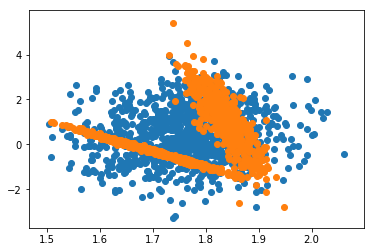

In [6]:
# this code creates two randoms distributions and scales them to have the same mean and covariance
np.random.seed(0)
x=np.random.randn(2) + np.random.randn(1000,2) @np.random.randn(2,2)
y=np.concatenate([np.random.randn(500,2)@np.random.randn(2,2),
                 [4,4]+np.random.randn(500,2)@np.random.randn(2,2)])
A=la.sqrtm(np.cov(x.T))
B=la.sqrtm(np.cov(y.T))
y=((y-np.mean(y,0))@np.linalg.inv(B)@A)+np.mean(x,0)
plt.scatter(*x.T)
plt.scatter(*y.T)

### Histograms - Numerical data

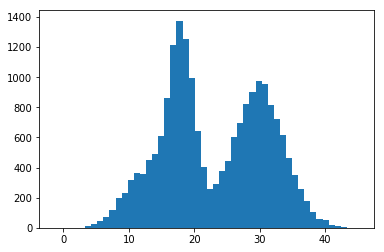

In [10]:
np.random.seed(0)
data = np.concatenate([30 + 4*np.random.randn(10000),
                       18 + 2*np.random.randn(7000),
                       12 + 3*np.random.randn(3000)])
plt.hist(data, bins=50);

### Scatter Plot

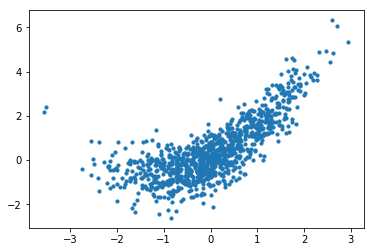

In [11]:
x = np.random.randn(1000)
y = 0.4*x**2 + x + 0.7*np.random.randn(1000)
plt.scatter(x,y,s=10)

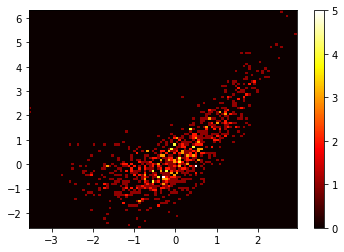

In [12]:
plt.hist2d(x,y,bins=100);
plt.colorbar();
plt.set_cmap('hot')

### Line Plots

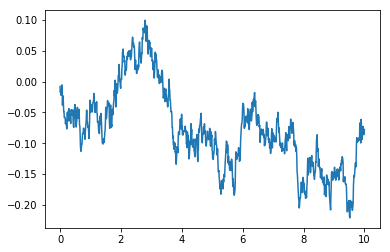

In [13]:
x = np.linspace(0,10,1000)
y = np.cumsum(0.01*np.random.randn(1000))
plt.plot(x,y)

### Box,whiskers and violin plot

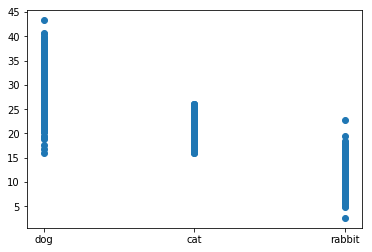

In [14]:
data= {"dog": 30 + 4*np.random.randn(1000),
       "cat": 16 + 10*np.random.rand(700),
       "rabbit": 12 + 3*np.random.randn(300)}
plt.scatter(np.concatenate([i*np.ones(len(x)) for i,x in enumerate(data.values())]),
            np.concatenate(list(data.values())))
plt.xticks(range(len(data)), data.keys());

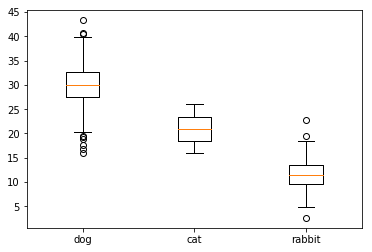

In [15]:
plt.boxplot(data.values())
plt.xticks(range(1,len(data)+1), data.keys());

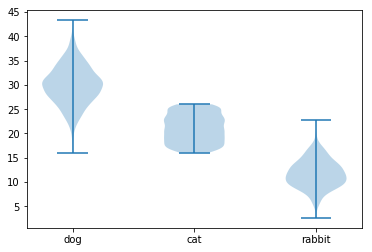

In [16]:
plt.violinplot(data.values())
plt.xticks(range(1,len(data)+1), data.keys());

### Heat map and Bubble plots

In [17]:
types = np.array([('dog', 'house'), ('dog', 'appt'), 
                  ('cat', 'house'), ('cat', 'appt'), 
                  ('rabbit', 'house'), ('rabbit', 'appt')])
data = types[np.random.choice(range(6), 2000, p=[0.4, 0.1, 0.12, 0.18, 0.05, 0.15]),:]

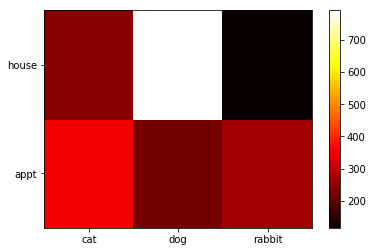

In [18]:
label_x, x = np.unique(data[:,0], return_inverse=True)
label_y, y = np.unique(data[:,1], return_inverse=True)
M, xt, yt, _ = plt.hist2d(x,y, bins=(len(label_x), len(label_y)))
plt.xticks((xt[:-1]+xt[1:])/2, label_x)
plt.yticks((yt[:-1]+yt[1:])/2, label_y)
plt.colorbar()

([<matplotlib.axis.YTick at 0x157c6b8bda0>,
 <a list of 2 Text yticklabel objects>)

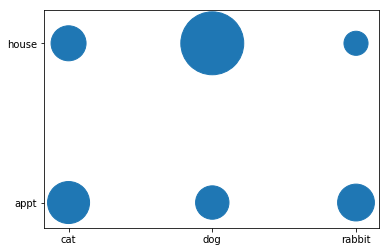

In [19]:
xy, cnts = np.unique((x,y), axis=1, return_counts=True)
plt.scatter(xy[0], xy[1], s=cnts*5)
plt.xticks(range(len(label_x)), label_x)
plt.yticks(range(len(label_y)), label_y)

### 3D Scatter Plots

In [20]:
x = np.random.randn(1000)
y = 0.4*x**2 + x + 0.7*np.random.randn(1000)
z = 0.5 + 0.2*(y-1)**2 + 0.1*np.random.randn(1000)

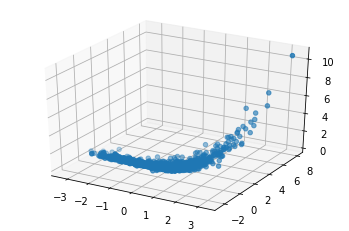

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)

### Scatter Matrices

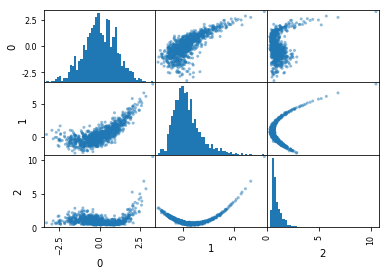

In [22]:
import pandas as pd
df = pd.DataFrame([x,y,z]).transpose()
pd.plotting.scatter_matrix(df, hist_kwds={'bins':50});

### Bubble Plots

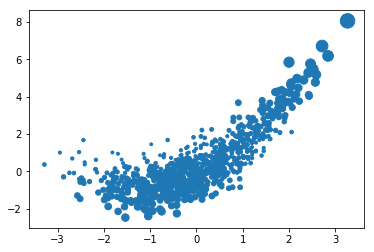

In [23]:
plt.scatter(x,y,s=z*20)

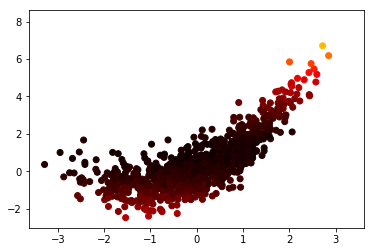

In [24]:
plt.scatter(x,y,c=z)

### Colored Scatter Plots

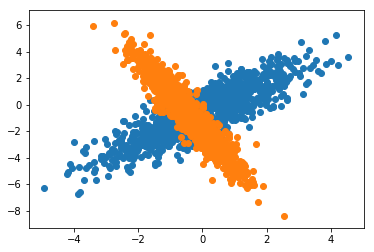

In [25]:
np.random.seed(0)
xy1 = np.random.randn(1000,2) @ np.random.randn(2,2) + np.random.randn(2)
xy2 = np.random.randn(1000,2) @ np.random.randn(2,2) + np.random.randn(2)
plt.scatter(xy1[:,0], xy1[:,1])
plt.scatter(xy2[:,0], xy2[:,1])